# CartPole environment

In [1]:
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import latexify
import math
import gym

In [2]:
env = gym.make("CartPole-v1", render_mode='rgb_array')
np.set_printoptions(formatter={'float': '{:0.2e}'.format})
print('Observation space: ', np.hstack([env.observation_space.low, env.observation_space.high]), '\nAction space:', env.action_space.n)

Observation space:  [-4.80e+00 -3.40e+38 -4.19e-01 -3.40e+38 4.80e+00 3.40e+38 4.19e-01
 3.40e+38] 
Action space: 2


In [3]:
episode_returns = [] 
time_steps = 30
episodes = 30
env.reset()
episode_images = []

In [4]:
@latexify.with_latex
def policy(s2, s3):
  if (s2 + s3/3) < 0:
    return 0
  else:
    return 1  

policy

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7fd956871d30>

<bound method Wrapper.close of <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

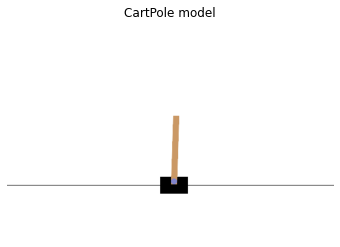

In [5]:
fig, ax = plt.subplots()
ax.axis('off')
ax.set_title('CartPole model')

for n_episode in range(episodes):
  observation = env.reset()[0]
  n_img = ax.imshow(env.render(), animated=True)
  for n_time_step in range(time_steps):
    pos = observation[0]
    v = observation[1]
    angle = observation[2]
    angle_v = observation[3]
    action = policy(angle, angle_v)
    observation, reward, done, _, _, = env.step(action)
    if done:
      print("Episode Number", n_episode, "Timesteps", n_time_step)
      break
  episode_returns.append(n_time_step)
  episode_images.append([n_img])
env.close

In [6]:
experiment = animation.ArtistAnimation(fig, episode_images, interval=800, repeat=3000, blit=True)
HTML(experiment.to_html5_video())